In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_eps_reward (fname): 
    data = pd.read_csv(fname).to_numpy()
    data = data[:,1:]

    fig, ax1 = plt.subplots(figsize=(18,7))

    color = 'tab:red'
    ax1.set_xlabel('epochs')
    ax1.set_ylabel('epsilon', color=color)
    ax1.plot(data[:,0], data[:,3], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('reward', color=color)  # we already handled the x-label with ax1
    ax2.plot(data[:,0], data[:,2], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

def plot_eps_reward_cum (fname): 
    data = pd.read_csv(fname).to_numpy()
    data = data[:,1:]

    fig, ax1 = plt.subplots(figsize=(18,7))

    color = 'tab:red'
    ax1.set_xlabel('epochs')
    ax1.set_ylabel('epsilon', color=color)
    ax1.plot(data[:,0], data[:,3], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('reward', color=color)  # we already handled the x-label with ax1
    ax2.plot(data[:,0], np.cumsum(data[:,2]), color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

def plot_boxPlot_score (fname,ftest):
    data = pd.read_csv(fname).to_numpy()
    data = data[:,1:]
    data2 = pd.read_csv(ftest).to_numpy()
    data2 = data2[:,1:]
    d = [data[:,1],data2[:,1]]
    fig, ax= plt.subplots(figsize=(5,7))
    plt.boxplot(d)
    plt.title("Box plot Score")
    ax.set_xticklabels(['Train','Test'])
    plt.show()
    

def compare_resultTest_boxPlot():
    result = []
    label=[]
    data = pd.read_csv('score/Qtable_test_e_200_lr_0.1_df_0.9.csv').to_numpy()[:,1:]
    label.append('Qtable')
    result.append(data[:,1])
    for i in range(1,8): 
        data = pd.read_csv('score/Qnet'+str(i)+'_test_e_200_lr_0.1_df_0.9.csv').to_numpy()[:,1:]
        label.append('Qnet'+str(i))
        result.append(data[:,1])
    data = pd.read_csv('score/Qnet10_test_e_200_lr_0.1_df_0.9.csv').to_numpy()[:,1:]
    label.append('Qnet10')
    result.append(data[:,1])
    ig, ax= plt.subplots(figsize=(7,7))
    plt.boxplot(result)
    plt.title("Box plot Score")
    ax.set_xticklabels(label)
    plt.show()

def compare_resultTest_mean(fname):
    result = []
    data = pd.read_csv(fname).to_numpy()[:,1:]
    return np.mean(data[:,1])





# Qtable 
---
---

### States (126)
- Surrowding Head : 8
- Direction Apple : 8 

---

### Features  

- Learning Rate = 0.1
- Discount Factor = 0.9 
- Training : 2000 epochs 
- Testing : 100 eochs


### Reward Function 1 
---
---
- Touch the Apple = 40
- Touch a Wall or Itself = -100
- Getting Far Away of the Apple = -5
- Getting Clother of the Apple = 5

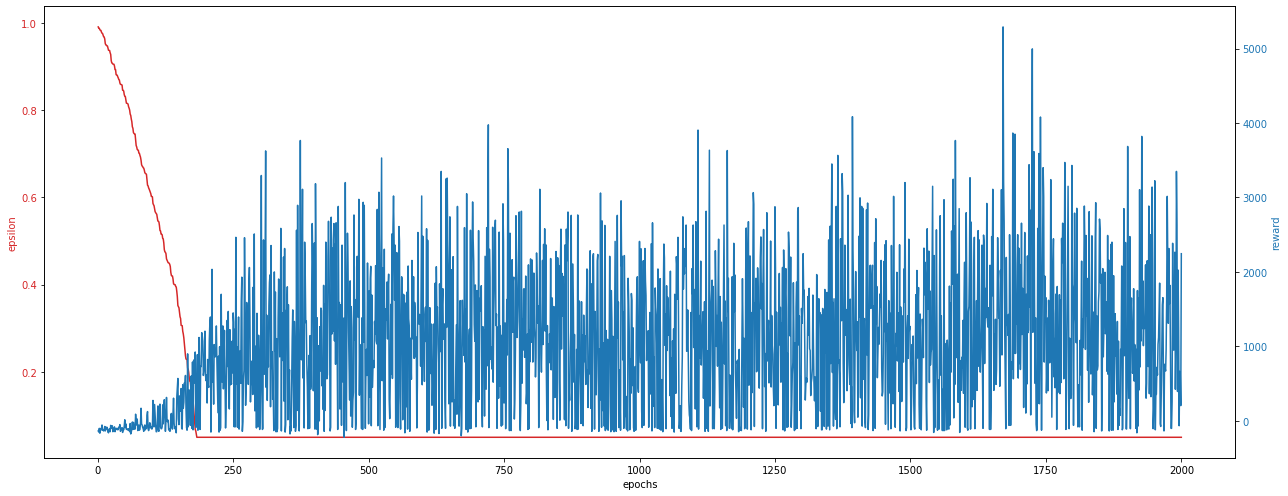

In [2]:
path1 = 'score/Qtable_train_e_2000_lr_0.1_df_0.9.csv'
plot_eps_reward(path1)

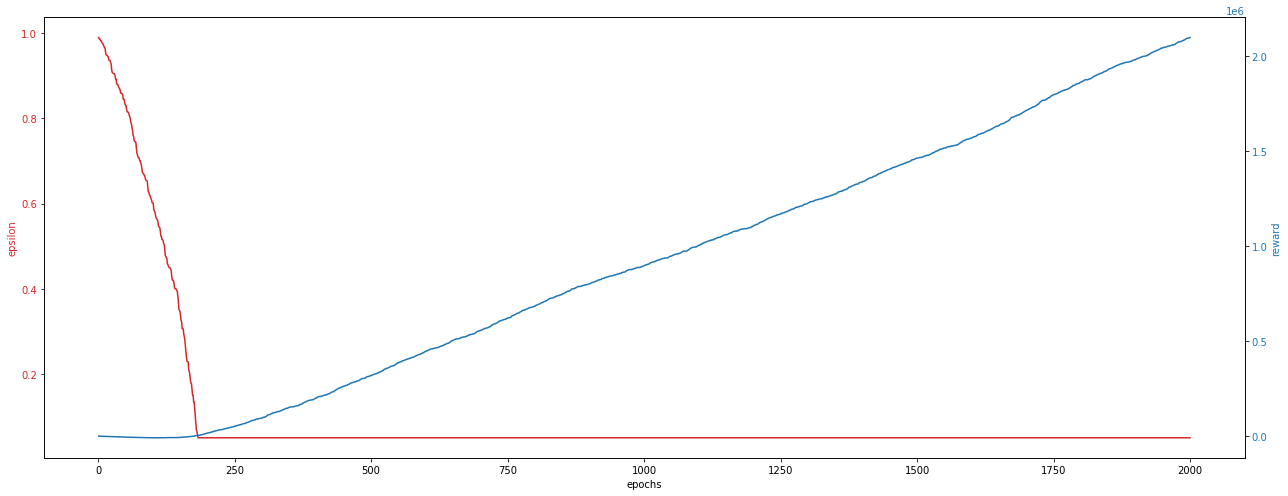

In [31]:
path1 = 'score/Qtable_train_e_2000_lr_0.1_df_0.9.csv'
plot_eps_reward_cum(path1)

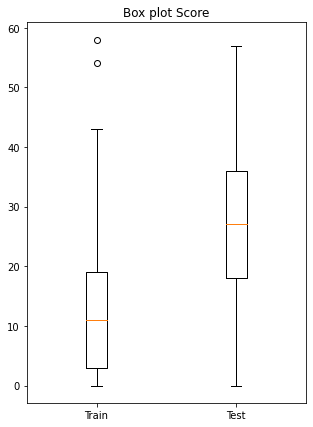

In [32]:
path1 = 'score/Qtable_train_e_2000_lr_0.1_df_0.9.csv'
path = 'score/Qtable_test_e_200_lr_0.1_df_0.9.csv'
plot_boxPlot_score(path1,path)

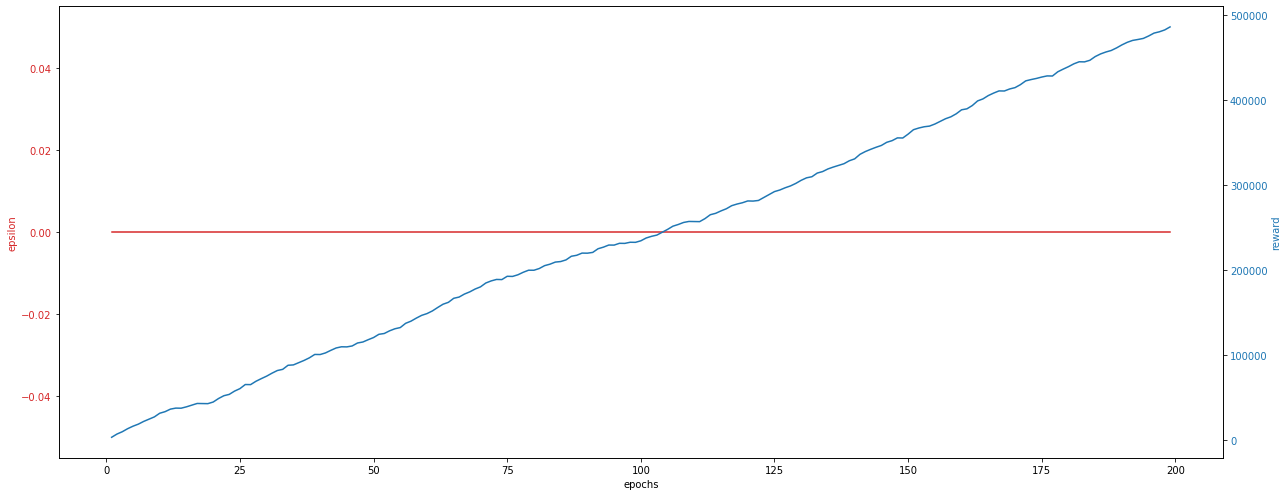

In [33]:
plot_eps_reward_cum(path)

In [34]:
print('Mean Training :', compare_resultTest_mean(path1))
print('Mean Test :', compare_resultTest_mean(path))


Mean Training : 12.123
Mean Test : 26.733668341708544


## Qnetwork 1
---
---

### States 
- Surrowding Head : 24
- relative position of the apple to head



----

### Features 
- Learning Rate = 0.1
- Discount Factor = 0.99
- Training : 2000 epochs
- Time of Training : 27:34

---

### Neural Network 
- Batch Size : 64
- Input Layer : 26
- Hidden Layer 1 : ReLu / 16 
- Hidden Layer 1 : ReLu / 16
- Output Layer : 4 

--- 

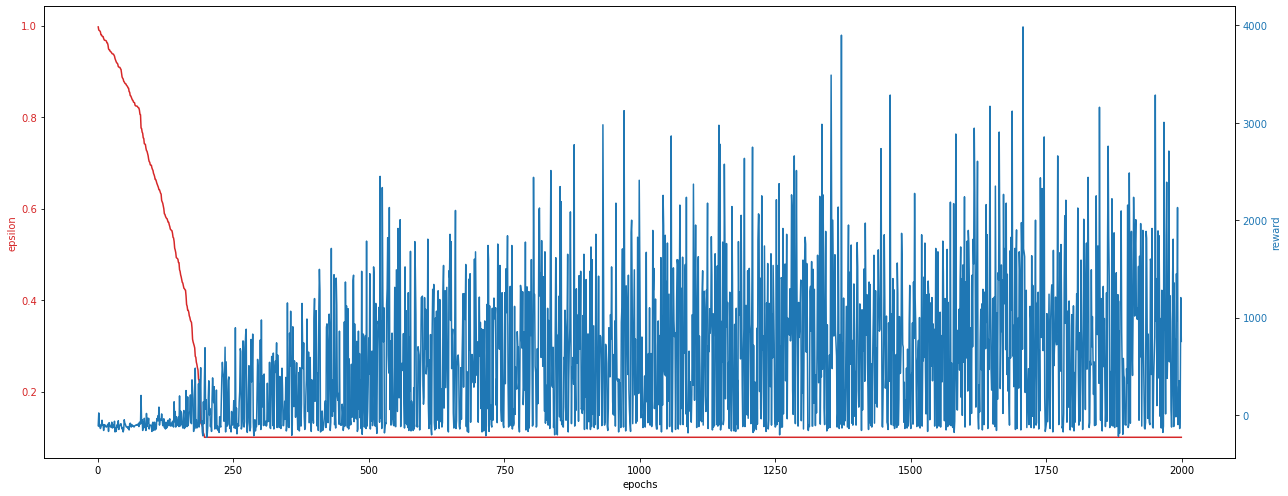

In [35]:
path1 = 'score/Qnet1_train_e_2000_lr_0.1_df_0.99.csv'
plot_eps_reward(path1)

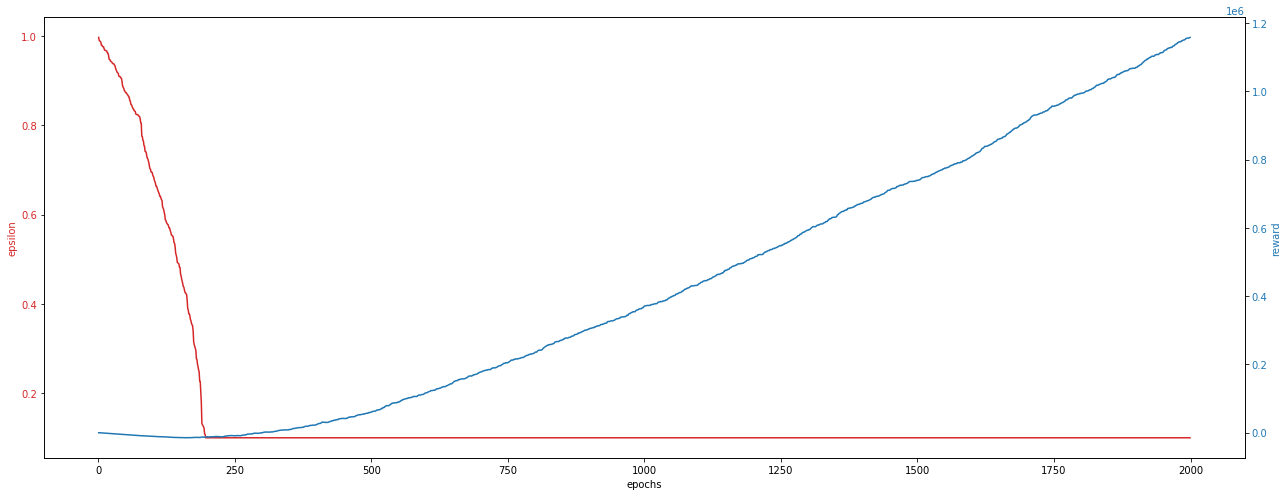

In [36]:
plot_eps_reward_cum(path1)

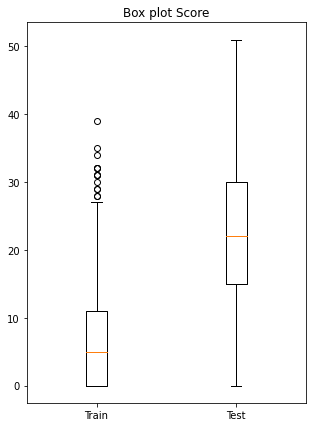

In [37]:
path = 'score/Qnet1_test_e_200_lr_0.1_df_0.9.csv'
plot_boxPlot_score(path1,path)

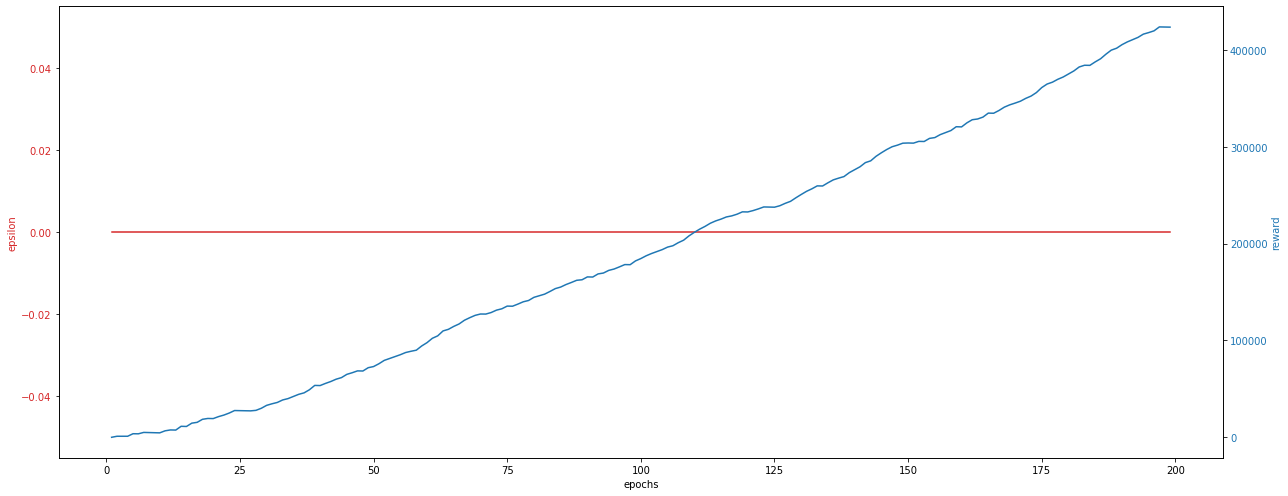

In [39]:
plot_eps_reward_cum(path)

In [ ]:
print('Mean Training :', compare_resultTest_mean(path1))
print('Mean Test :', compare_resultTest_mean(path))

## Qnetwork 2
---
---

### States 
- Surrowding Head : 24
- relative position of the apple to head



----

### Features 
- Learning Rate = 0.1
- Discount Factor = 0.99
- Training : 2000 epochs
- Time of Training : 

---

### Neural Network 
- Batch Size : 64
- Input Layer : 26
- Hidden Layer 1 : ReLu / 32 
- Hidden Layer 1 : ReLu / 16
- Output Layer : 4 

--- 

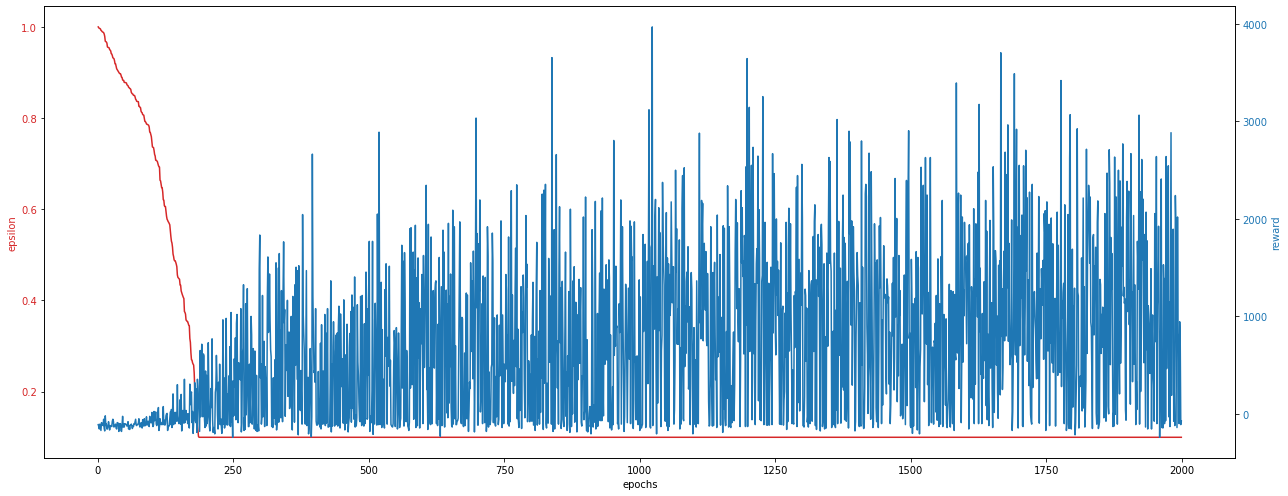

In [40]:
path1 = 'score/Qnet2_train_e_2000_lr_0.1_df_0.99.csv'
plot_eps_reward(path1)

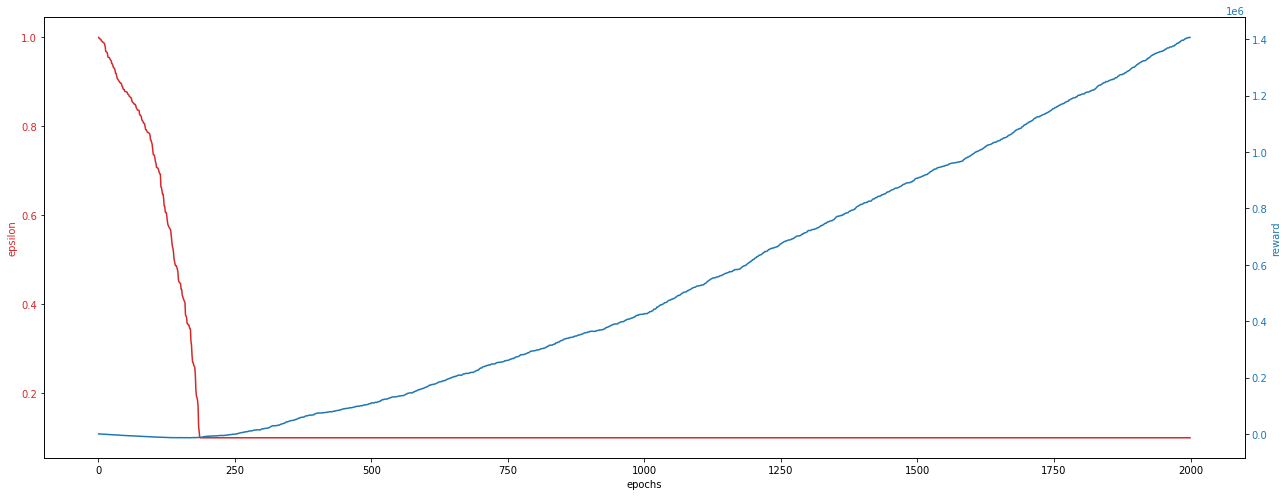

In [41]:
plot_eps_reward_cum(path1)

## Qnetwork 3
---
---

### States 
- Surrowding Head : 24
- relative position of the apple to head



----

### Features 
- Learning Rate = 0.1
- Discount Factor = 0.99
- Training : 2000 epochs
- Time of Training : 

---

### Neural Network 
- Batch Size : 64
- Input Layer : 26
- Hidden Layer 1 : ReLu / 12
- Hidden Layer 1 : ReLu / 12
- Output Layer : 4 

--- 

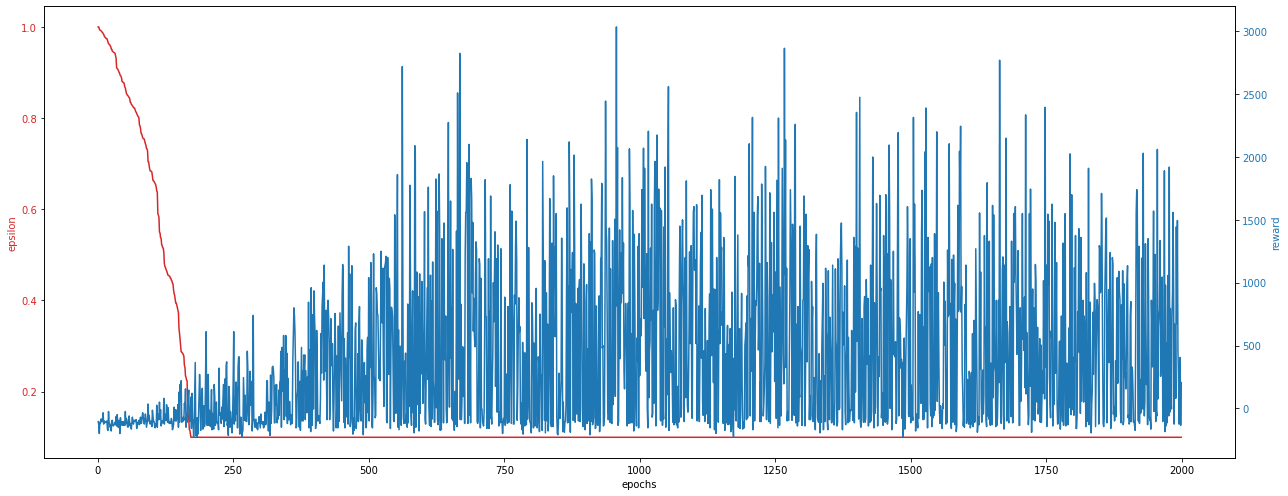

In [43]:
path1 = 'score/Qnet3_train_e_2000_lr_0.1_df_0.99.csv'
plot_eps_reward(path1)

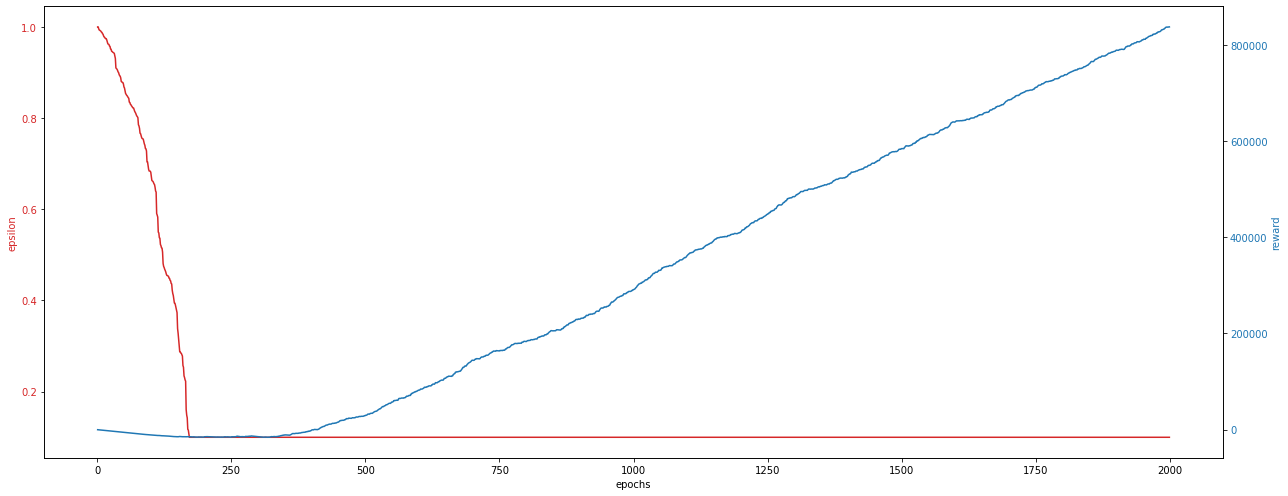

In [44]:
plot_eps_reward_cum(path1)

## Qnetwork 4
---
---

### States 
- Surrowding Head : 24
- relative position of the apple to head



----

### Features 
- Learning Rate = 0.1
- Discount Factor = 0.99
- Training : 2000 epochs
- Time of Training : 

---

### Neural Network 
- Batch Size : 64
- Input Layer : 26
- Hidden Layer 1 : ReLu / 32
- Hidden Layer 1 : ReLu / 32
- Output Layer : 4 

--- 

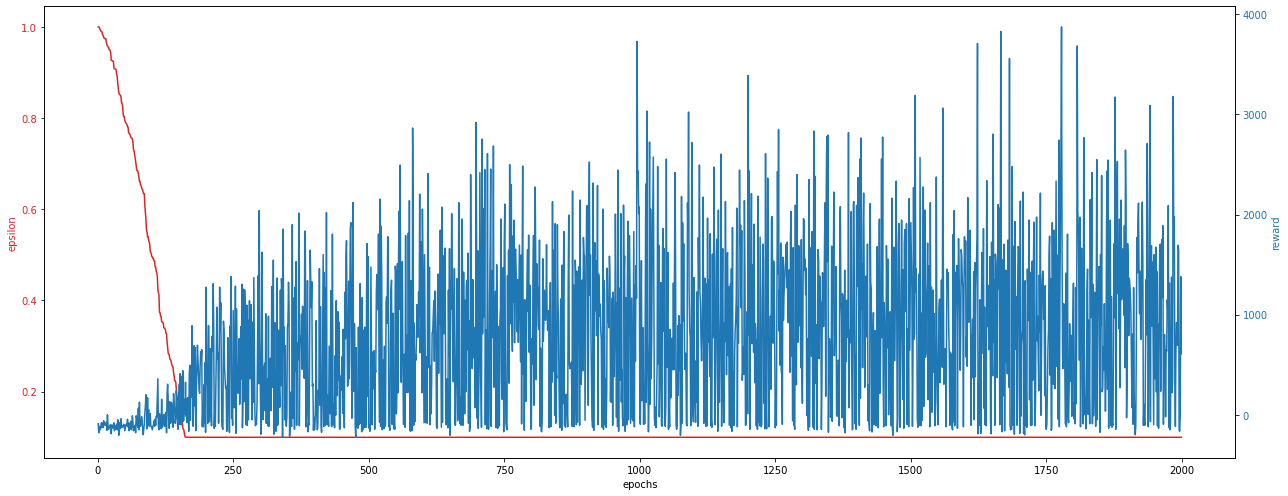

In [45]:
path1 = 'score/Qnet4_train_e_2000_lr_0.1_df_0.99.csv'
plot_eps_reward(path1)

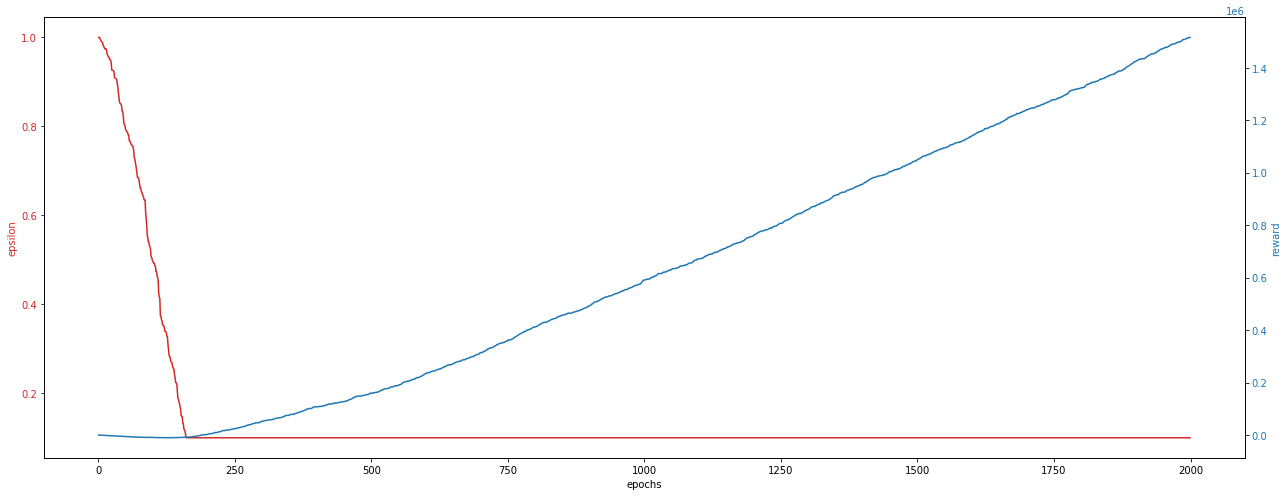

In [46]:
plot_eps_reward_cum(path1)

In [2]:
a = []
a.append('e')
a

[&#39;e&#39;]

In [8]:
a = np.array([[1,2], [3,4]])
b = []
b.append(a)

In [9]:
b

[array([[1, 2],
        [3, 4]])]

In [33]:
a= []

In [34]:
a.append([[20, 160],[[170, 20]]])

In [35]:
a.append([[20, 160],[[170, 30]]])

In [36]:
a

[[[20, 160], [[170, 20]]], [[20, 160], [[170, 30]]]]

In [78]:
def column(matrix,score):
    tmp = [row[1] for row in matrix]
    if all([score > x for x in tmp]):
        return True
    else: 
        return False

In [80]:
a = [] 
a.append([23,54,'hey'])
a.append([2,5,'h'])
score = 78
b = column(a,score)
b

up


In [64]:
print(a[1:])

[[23, 54, &#39;hey&#39;]]


In [74]:
a = [] 
a.append([23,54,'hey'])
a.append([2,5,'h'])
score = 7 
if all([score > x for x in for [row[i] for row in a]): 
    print('hey')

SyntaxError: invalid syntax (&lt;ipython-input-74-5beda017913e&gt;, line 5)